In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

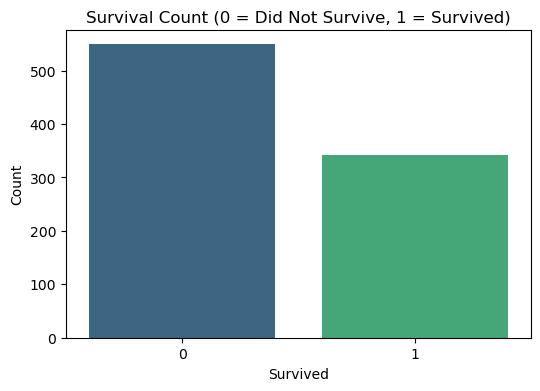

In [7]:
# Overall survival distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count (0 = Did Not Survive, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

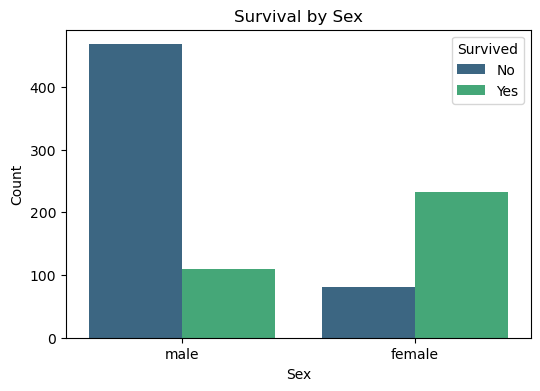

In [8]:
# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

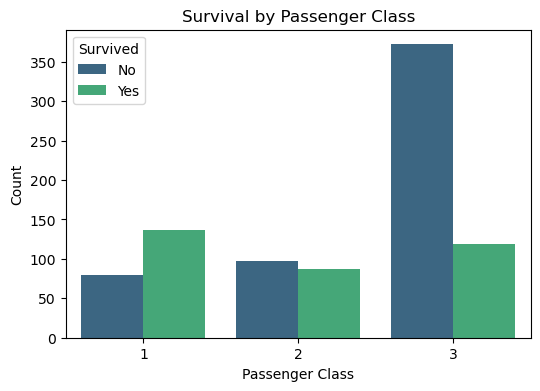

In [9]:
# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

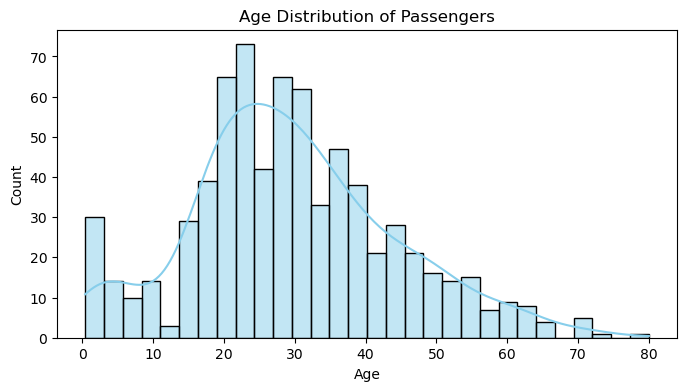

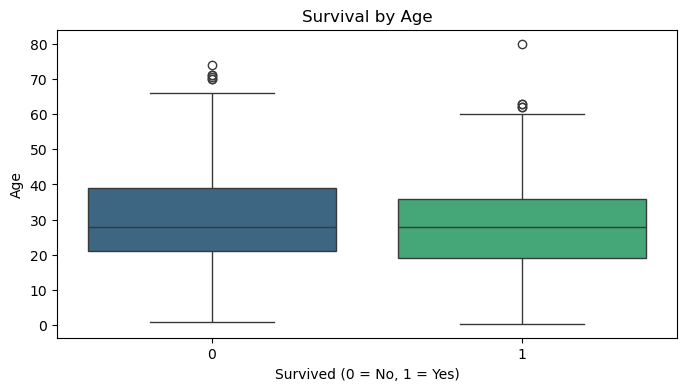

In [10]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival vs Age (boxplot)
plt.figure(figsize=(8,4))
sns.boxplot(x='Survived', y='Age', data=df, palette='viridis')
plt.title('Survival by Age')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

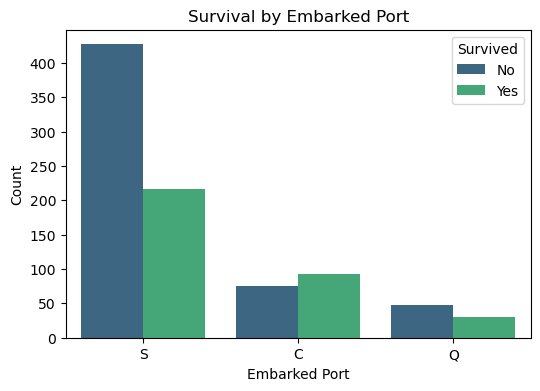

In [11]:
# Survival by Embarked Port
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Missing 'Age' before: 177
Filled missing 'Age' with median: 28.0
Missing 'Age' after: 0


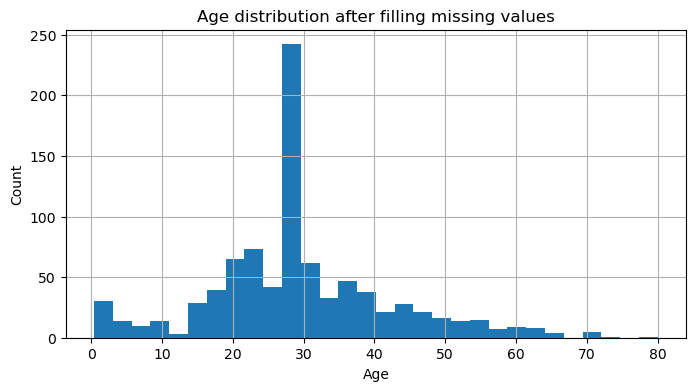

In [12]:
# Check missing before, fill with median, check after
print("Missing 'Age' before:", df['Age'].isnull().sum())

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

print("Filled missing 'Age' with median:", median_age)
print("Missing 'Age' after:", df['Age'].isnull().sum())

# Quick visual check
plt.figure(figsize=(8,4))
df['Age'].hist(bins=30)
plt.title('Age distribution after filling missing values')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Missing 'Embarked' before: 2
Filled missing 'Embarked' with mode: S
Missing 'Embarked' after: 0


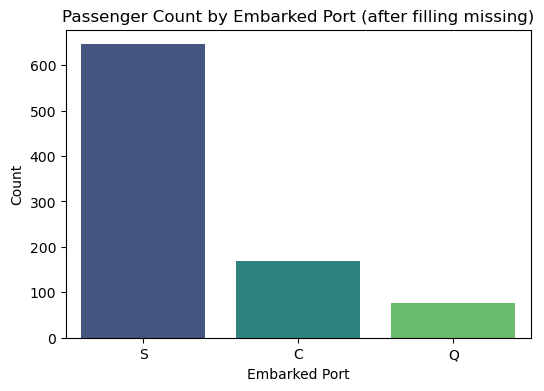

In [13]:
# Check missing before
print("Missing 'Embarked' before:", df['Embarked'].isnull().sum())

# Find mode (most frequent value)
mode_embarked = df['Embarked'].mode()[0]

# Fill missing with mode
df['Embarked'].fillna(mode_embarked, inplace=True)

# Check missing after
print("Filled missing 'Embarked' with mode:", mode_embarked)
print("Missing 'Embarked' after:", df['Embarked'].isnull().sum())

# Quick visual check
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', data=df, palette='viridis')
plt.title('Passenger Count by Embarked Port (after filling missing)')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

In [14]:
# Drop Cabin column
print("Columns before drop:", df.columns.tolist())

df.drop(columns=['Cabin'], inplace=True)

print("Columns after drop:", df.columns.tolist())

Columns before drop: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Columns after drop: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [15]:
# Check unique values before
print("Unique values in 'Sex' before:", df['Sex'].unique())

# Map male->0, female->1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Check unique values after
print("Unique values in 'Sex' after:", df['Sex'].unique())

Unique values in 'Sex' before: ['male' 'female']
Unique values in 'Sex' after: [0 1]


In [16]:
# Check unique values before
print("Unique values in 'Embarked' before:", df['Embarked'].unique())

# One-hot encode Embarked (keep all dummies)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)

# Check new columns
print("Columns after one-hot encoding:", df.columns.tolist())

Unique values in 'Embarked' before: ['S' 'C' 'Q']
Columns after one-hot encoding: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [17]:
# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Quick check
print(df[['SibSp', 'Parch', 'FamilySize']].head(10))

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
5      0      0           1
6      0      0           1
7      3      1           5
8      0      2           3
9      1      0           2


In [18]:
# Create IsAlone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Quick check
print(df[['FamilySize', 'IsAlone']].head(10))

   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1
5           1        1
6           1        1
7           5        0
8           3        0
9           2        0


In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,False,False,True,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,False,False,True,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,False,False,True,4,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,True,False,False,1,1


In [20]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Check value counts
print(df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [21]:
# Replace and group titles
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace(
    ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Countess', 'Lady', 'Sir', 'Don', 'Jonkheer'], 
    'Rare'
)

# Check grouped titles
print(df['Title'].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [22]:
# One-hot encode Title
df = pd.get_dummies(df, columns=['Title'], drop_first=False)

# Check new columns
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


In [23]:
# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Check remaining columns
print(df.columns.tolist())

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


In [24]:
# Define target variable
y = df['Survived']

# Define feature set (all columns except Survived)
X = df.drop('Survived', axis=1)

# Check shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (891, 16)
Target vector shape: (891,)


In [25]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (712, 16) (712,)
Testing set: (179, 16) (179,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8491620111731844

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179


Confusion Matrix:
 [[99 11]
 [16 53]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[95 15]
 [17 52]]


In [28]:
from sklearn.svm import SVC

# Initialize and train SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.6256983240223464

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.87      0.74       110
           1       0.53      0.23      0.32        69

    accuracy                           0.63       179
   macro avg       0.59      0.55      0.53       179
weighted avg       0.60      0.63      0.58       179


Confusion Matrix:
 [[96 14]
 [53 16]]


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179


Confusion Matrix:
 [[99 11]
 [22 47]]


In [30]:
!pip install xgboost

In [31]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[97 13]
 [22 47]]


In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Stratified K-Fold (5 splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(log_reg, X, y, cv=skf, scoring='accuracy')

print("Logistic Regression CV Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Logistic Regression CV Scores: [0.83798883 0.81460674 0.8258427  0.83146067 0.83146067]
Mean CV Accuracy: 0.8282719226664993


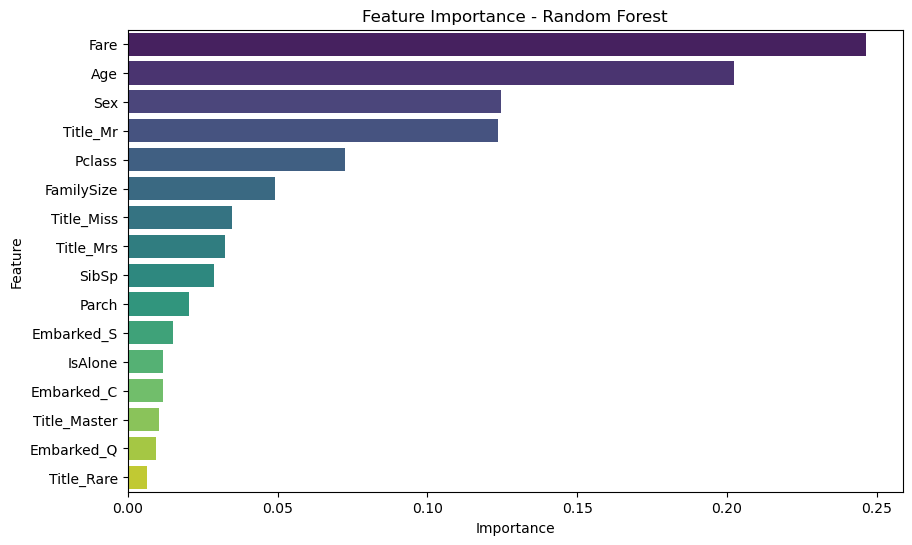

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from Random Forest
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

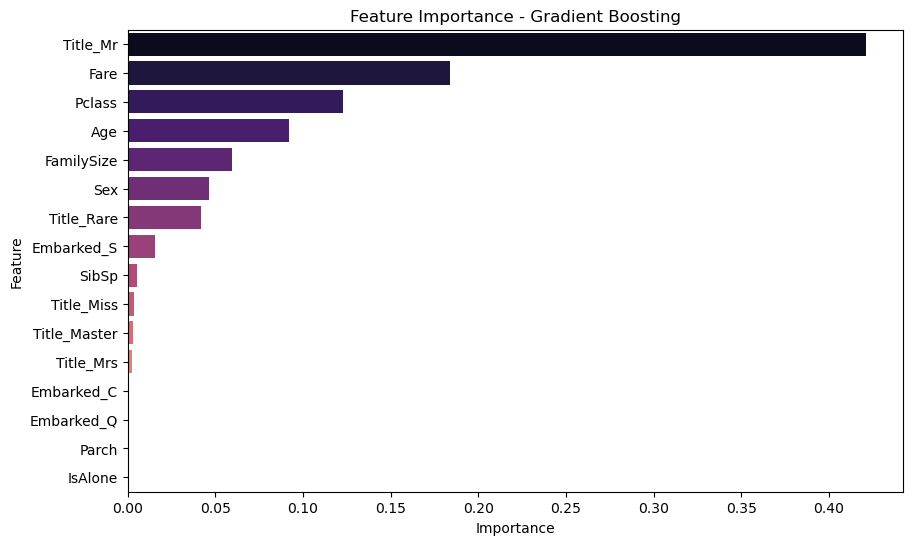

In [34]:
# Get feature importances from Gradient Boosting
importances_gb = gb_model.feature_importances_
features = X.columns

# Create DataFrame
feat_imp_gb_df = pd.DataFrame({'Feature': features, 'Importance': importances_gb})
feat_imp_gb_df = feat_imp_gb_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_gb_df, palette='magma')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with 5-fold CV
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

# Fit Grid Search
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)

# Predict with best model
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.8258938244853737
Test Accuracy: 0.8324022346368715

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                       param_grid=param_grid_gb,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

# Fit
grid_gb.fit(X_train, y_train)

# Best parameters and CV score
print("Best Parameters (GB):", grid_gb.best_params_)
print("Best CV Accuracy (GB):", grid_gb.best_score_)

# Predict with best GB model
best_gb = grid_gb.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)

# Evaluate
print("Test Accuracy (GB):", accuracy_score(y_test, y_pred_best_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_gb))

Best Parameters (GB): {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Accuracy (GB): 0.8287599724219442
Test Accuracy (GB): 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# GridSearchCV
grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                        param_grid=param_grid_xgb,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)

# Fit
grid_xgb.fit(X_train, y_train)

# Best parameters and CV score
print("Best Parameters (XGB):", grid_xgb.best_params_)
print("Best CV Accuracy (XGB):", grid_xgb.best_score_)

# Predict with best XGB model
best_xgb = grid_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate
print("Test Accuracy (XGB):", accuracy_score(y_test, y_pred_best_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_xgb))

Best Parameters (XGB): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy (XGB): 0.8287304245050724
Test Accuracy (XGB): 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [42]:
import pickle

with open("log_reg_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

In [45]:
# Correct feature order
feature_order = ["Pclass","Sex","Age","SibSp","Parch","Fare",
                 "Embarked_C","Embarked_Q","Embarked_S",
                 "FamilySize","IsAlone",
                 "Title_Master","Title_Miss","Title_Mr","Title_Mrs","Title_Rare"]

# Sample input (add Title_Rare = 0 if not rare)
sample_input = {
    "Pclass": 3,
    "Sex": 0,
    "Age": 22,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Embarked_C": 0,
    "Embarked_Q": 0,
    "Embarked_S": 1,
    "FamilySize": 2,
    "IsAlone": 0,
    "Title_Master": 0,
    "Title_Miss": 0,
    "Title_Mr": 1,
    "Title_Mrs": 0,
    "Title_Rare": 0
}

# Convert to array
import numpy as np
input_array = np.array([sample_input[feat] for feat in feature_order]).reshape(1, -1)

# Load model and predict
import pickle
with open("log_reg_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

prediction = loaded_model.predict(input_array)[0]
probability = loaded_model.predict_proba(input_array)[0][1]

result_text = "SURVIVE" if prediction == 1 else "NOT SURVIVE"
print("Prediction:", prediction)
print("Probability:", probability)
print("Result:", result_text)

Prediction: 0
Probability: 0.08069621693269767
Result: NOT SURVIVE
